In [21]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection




# Importing Dataset

In [2]:
df = pd.read_csv('fishdatset.csv')
print(df.head(5))
print("Shape of Dataset: ", df.shape)



    ph  temperature  turbidity   fish
0  6.0         27.0        4.0  katla
1  7.6         28.0        5.9   sing
2  7.8         27.0        5.5   sing
3  6.5         31.0        5.5  katla
4  8.2         27.0        8.5  prawn
Shape of Dataset:  (591, 4)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ph           591 non-null    float64
 1   temperature  591 non-null    float64
 2   turbidity    591 non-null    float64
 3   fish         591 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,591.0,7.532115,0.810588,5.5,6.99,7.50,8.200,9.0
temperature,591.0,21.789306,4.536612,4.0,17.94,21.06,24.000,35.0
turbidity,591.0,4.432944,2.169062,1.0,3.48,3.57,4.005,15.8


In [5]:
df.value_counts('fish')

fish
tilapia      129
rui           99
pangas        78
katla         58
silverCup     55
shrimp        50
sing          49
karpio        33
koi           15
prawn         14
magur         11
dtype: int64

In [6]:
df.isnull().sum()

ph             0
temperature    0
turbidity      0
fish           0
dtype: int64

In [17]:
df.nunique()

ph              91
temperature     51
turbidity      108
fish            11
dtype: int64

In [18]:
df['fish'].unique()

array(['katla', 'sing', 'prawn', 'rui', 'koi', 'pangas', 'tilapia',
       'silverCup', 'karpio', 'magur', 'shrimp'], dtype=object)

In [19]:
df['fish'].value_counts()

tilapia      129
rui           99
pangas        78
katla         58
silverCup     55
shrimp        50
sing          49
karpio        33
koi           15
prawn         14
magur         11
Name: fish, dtype: int64

In [20]:
fish_summary = pd.pivot_table(df, index=['fish'], aggfunc='mean')
fish_summary

,ph,temperature,turbidity
fish,,,
karpio,7.236364,19.363636,7.684848
katla,7.717241,23.102759,3.736034
koi,6.673333,26.000000,4.618667
magur,7.236364,25.181818,7.709091
pangas,8.478462,20.987179,3.642051
prawn,7.892857,28.928571,6.315000
rui,7.062020,22.430707,3.749495
shrimp,7.154400,22.140000,6.833800
silverCup,6.832364,22.186909,3.876000


# VIZUALISATION

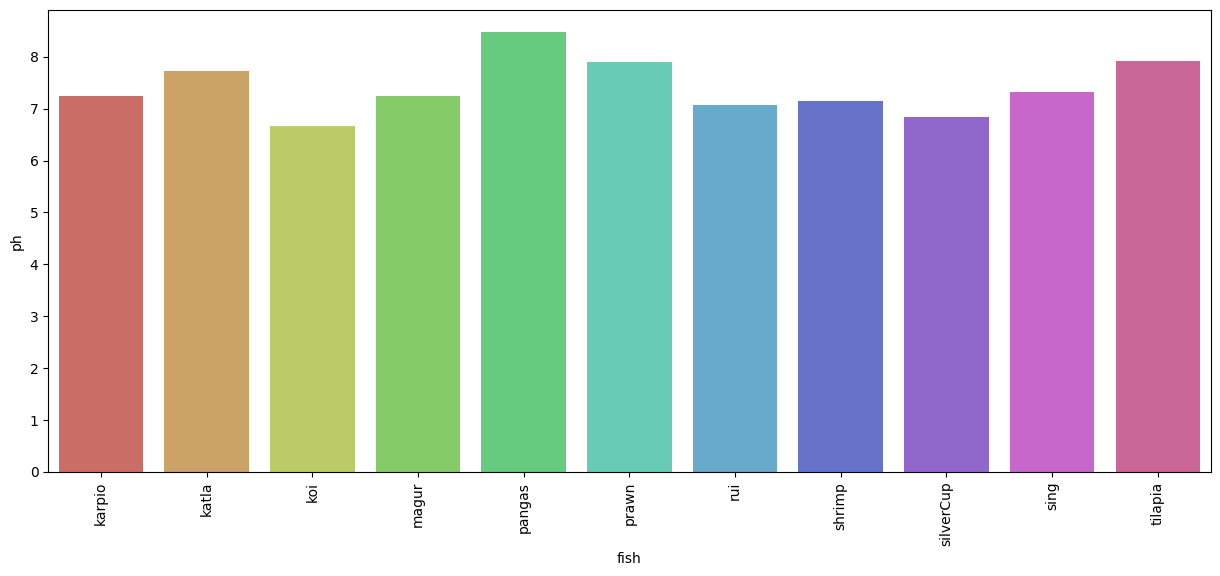

In [23]:
fish_summary_new = fish_summary.reset_index()
fish_summary_new


plt.figure(figsize=(15,6))
sns.barplot(y = 'ph', x = 'fish', data=fish_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()


# Separating Labels from Features

In [7]:
init_label= df['fish']
init_features = df.drop("fish",axis=1)
print("Labels:-")
print(init_label.head(5))
print("Features:-")
print(init_features.head(5))
print(init_features.shape)

Labels:-
0    katla
1     sing
2     sing
3    katla
4    prawn
Name: fish, dtype: object
Features:-
    ph  temperature  turbidity
0  6.0         27.0        4.0
1  7.6         28.0        5.9
2  7.8         27.0        5.5
3  6.5         31.0        5.5
4  8.2         27.0        8.5
(591, 3)


# Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler
standardized_features = StandardScaler().fit_transform(init_features)
standardized_features = pd.DataFrame(standardized_features) 
print(standardized_features.head(5))


          0         1         2
0 -1.891730  1.149560 -0.199769
1  0.083819  1.370176  0.676928
2  0.330762  1.149560  0.492360
3 -1.274371  2.032022  0.492360
4  0.824650  1.149560  1.876618


# KNN MODEL

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#We have 2200 Points; 
#We split it such that we get 20% of the points(440) points in Test Dataset
Xtrain0, Xtest, Ytrain0, Ytest= model_selection.train_test_split(init_features, init_label, test_size=0.2, random_state=42)

print("==========================")
print("Train Data Shape")
print(Xtrain0.shape)
print(Ytrain0.shape)
print("===========================")
print("Test Data Shape")
print(Xtest.shape)
print(Ytest.shape)


Train Data Shape
(472, 3)
(472,)
Test Data Shape
(119, 3)
(119,)


In [10]:
# We are using Cross Validation for determining right value of K(Hyperparameter )

for i in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, Xtrain0.to_numpy(), Ytrain0, cv=5, scoring='accuracy')
    print('\n Cross Validation Score for k = %d is ' % (i))
    print(score.mean())



 Cross Validation Score for k = 1 is 
0.8094288913773797

 Cross Validation Score for k = 3 is 
0.7499888017917133

 Cross Validation Score for k = 5 is 
0.6694288913773796

 Cross Validation Score for k = 7 is 
0.6481970884658456

 Cross Validation Score for k = 9 is 
0.6122060470324747

 Cross Validation Score for k = 11 is 
0.5952967525195969

 Cross Validation Score for k = 13 is 
0.607973124300112

 Cross Validation Score for k = 15 is 
0.5953415453527435

 Cross Validation Score for k = 17 is 
0.56996640537514

 Cross Validation Score for k = 19 is 
0.5784322508398656

 Cross Validation Score for k = 21 is 
0.56996640537514

 Cross Validation Score for k = 23 is 
0.5678611422172452

 Cross Validation Score for k = 25 is 
0.5488241881298992

 Cross Validation Score for k = 27 is 
0.5572228443449048

 Cross Validation Score for k = 29 is 
0.5572676371780515


In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain0.to_numpy(), Ytrain0)
pred = knn.predict(Xtest.to_numpy())
acc = accuracy_score(Ytest, pred, normalize=True) * float(100)
print('Test Accuracy Score for this Model is= %f%%' % (acc))

from sklearn.metrics import classification_report
print(classification_report(Ytest, pred))

Test Accuracy Score for this Model is= 68.067227%
              precision    recall  f1-score   support

      karpio       0.75      0.75      0.75         4
       katla       0.53      0.62      0.57        13
         koi       0.00      0.00      0.00         4
       magur       0.50      0.50      0.50         2
      pangas       0.62      0.62      0.62        13
       prawn       0.00      0.00      0.00         1
         rui       0.93      0.82      0.87        17
      shrimp       1.00      0.69      0.82        13
   silverCup       0.80      0.80      0.80        10
        sing       0.35      0.67      0.46         9
     tilapia       0.89      0.73      0.80        33

    accuracy                           0.68       119
   macro avg       0.58      0.56      0.56       119
weighted avg       0.74      0.68      0.70       119



# Training on Gaussian Naive Bayes Model

In [12]:
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
GNBclf.fit(Xtrain0, Ytrain0)
YPred = GNBclf.predict(Xtest)
score = cross_val_score(GNBclf, Xtrain0, Ytrain0, cv=5, scoring='accuracy')
avgCVScore=score.mean()
print("5-fold CV score for Naive Bayes:, ", avgCVScore)

acc = accuracy_score(Ytest, YPred)
print("\nGaussian Naive Bayes's Accuracy aginst Test Dataset:", acc)

from sklearn.metrics import classification_report
print("\n")
print(classification_report(Ytest, YPred))

5-fold CV score for Naive Bayes:,  0.42163493840985444

Gaussian Naive Bayes's Accuracy aginst Test Dataset: 0.3949579831932773


              precision    recall  f1-score   support

      karpio       1.00      1.00      1.00         4
       katla       0.50      0.15      0.24        13
         koi       0.00      0.00      0.00         4
       magur       1.00      1.00      1.00         2
      pangas       0.33      0.08      0.12        13
       prawn       0.00      0.00      0.00         1
         rui       0.24      0.65      0.35        17
      shrimp       1.00      0.38      0.56        13
   silverCup       0.00      0.00      0.00        10
        sing       0.00      0.00      0.00         9
     tilapia       0.51      0.67      0.58        33

    accuracy                           0.39       119
   macro avg       0.42      0.36      0.35       119
weighted avg       0.43      0.39      0.36       119



/home/winnie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/winnie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/winnie/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Saving our model on pickle file

In [13]:
clf=GaussianNB()
clf.fit(init_features, init_label)
import pickle
from joblib import dump, load
dump(clf, 'GNBClassifier.pkl')



['GNBClassifier.pkl']

In [14]:
# Mostly XGBoost models use data that must be encoded before training it whereby thr categorical transformers like labelencoders are used to change categorical daya to numerical data.
#Therefore:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train0 = le.fit_transform(Ytrain0)



In [15]:
def recommendation(turbidity,temperature,ph):
    features = np.array([[turbidity,temperature,ph]])
    transformed_features = clf.fit_transform(Xtrain0)
    transformed_features = clf.fit_transform(transformed_features)
    prediction = clf.predict(transformed_features).reshape(1,-1)
    
    return prediction[0] 

In [16]:


temperature = 27
turbidity = 5.1
ph = 5 


predict = recommendation(temperature,turbidity,ph)


fish_dict = {1: "tilapia" , 2:"rui", 3:"pangas", 4:"katla", 5:"silverCup", 6:"shrimp", 7:"sing", 8:"karpio" , 9:"koi", 10:"prawn" ,11:"magur" }

if predict[0] in fish_dict:
    fish = fish_dict[predict[0]]
    print("{} is a best fish to be cultivated ".format(fish))
else:
    print("Sorry are not able to recommend a proper fish for this environment")


AttributeError: 'GaussianNB' object has no attribute 'fit_transform'